# Parameter recovery of the hierarchical DDM with starting point bias

In [1]:
import rlssm
import pandas as pd

## Simulate group data

In [2]:
from rlssm.random import simulate_hier_ddm

In [3]:
data = simulate_hier_ddm(n_trials=200, 
                         n_participants=10,
                         gen_mu_drift=.6, gen_sd_drift=.1,
                         gen_mu_threshold=.5, gen_sd_threshold=.1,
                         gen_mu_ndt=0, gen_sd_ndt=.01,
                         gen_mu_rel_sp=.1, gen_sd_rel_sp=.01)

In [4]:
data.head()

drift  threshold       ndt    rel_sp        rt  accuracy
participant trial                                                             
1           1      0.623365   0.997041  0.692471  0.539151  0.716471       1.0
            1      0.623365   0.997041  0.692471  0.539151  0.902471       1.0
            1      0.623365   0.997041  0.692471  0.539151  0.793471       1.0
            1      0.623365   0.997041  0.692471  0.539151  0.980471       0.0
            1      0.623365   0.997041  0.692471  0.539151  1.739471       1.0

In [5]:
data.groupby('participant').describe()[['rt', 'accuracy']]

rt                                                    \
             count      mean       std       min       25%       50%   
participant                                                            
1            200.0  0.951961  0.228372  0.710471  0.796221  0.888471   
2            200.0  0.977915  0.226304  0.730590  0.816340  0.919590   
3            200.0  0.999711  0.246408  0.728586  0.829836  0.935586   
4            200.0  0.926358  0.171244  0.720133  0.794883  0.892133   
5            200.0  0.885120  0.165347  0.708605  0.774355  0.831605   
6            200.0  0.939961  0.198498  0.711296  0.809296  0.900296   
7            200.0  0.909842  0.185368  0.703557  0.785057  0.844057   
8            200.0  0.902757  0.165986  0.710047  0.790047  0.854547   
9            200.0  0.892931  0.151139  0.711606  0.777356  0.852106   
10           200.0  0.955701  0.230286  0.726306  0.810306  0.901306   

                                accuracy                                       \
                  75%       max    count   mean       std  min  25%  50%  75%   
participant                                                                     
1            1.012721  2.130471    200.0  0.680  0.467647  0.0  0.0  1.0  1.0   
2            1.074590  2.046590    200.0  0.650  0.478167  0.0  0.0  1.0  1.0   
3            1.111336  2.373586    200.0  0.675  0.469550  0.0  0.0  1.0  1.0   
4            1.008383  1.610133    200.0  0.695  0.461563  0.0  0.0  1.0  1.0   
5            0.923105  1.585605    200.0  0.625  0.485338  0.0  0.0  1.0  1.0   
6            1.028546  2.424296    200.0  0.655  0.476561  0.0  0.0  1.0  1.0   
7            0.984807  2.023557    200.0  0.720  0.450126  0.0  0.0  1.0  1.0   
8            0.967047  1.645047    200.0  0.635  0.482638  0.0  0.0  1.0  1.0   
9            0.968856  1.604606    200.0  0.735  0.442441  0.0  0.0  1.0  1.0   
10           1.023556  2.345306    200.0  0.705  0.457187  0.0  0.0  1.0  1.0   

                  
             max  
participant       
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0  
10           1.0

## Initialize the model

In [6]:
model = rlssm.DDModel(hierarchical_levels = 2, starting_point_bias=True)

Using cached StanModel


## Fit

In [7]:
# sampling parameters
n_iter = 5000
n_chains = 2
n_thin = 1

In [8]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

Fitting the model using the priors:
drift_priors {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
threshold_priors {'mu_mu': 1, 'sd_mu': 3, 'mu_sd': 0, 'sd_sd': 3}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
rel_sp_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
3.0 of 5000 iterations ended with a divergence (0.06%)
  Try running with larger adapt_delta to remove the divergences
0 of 5000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [9]:
model_fit.rhat.describe()

,rhat
count,48.000000
mean,1.000329
std,0.000791
min,0.999604
25%,0.999880
50%,1.000038
75%,1.000444
max,1.003618


### calculate wAIC

In [10]:
model_fit.waic

{'lppd': -138.87336841598818,
 'p_waic': 23.687615971055777,
 'waic': 325.1219687740879,
 'waic_se': 92.20297977041197}

## Posteriors

In [11]:
model_fit.samples.describe()

,chain,draw,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,transf_mu_rel_sp,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],...,rel_sp_sbj[1],rel_sp_sbj[2],rel_sp_sbj[3],rel_sp_sbj[4],rel_sp_sbj[5],rel_sp_sbj[6],rel_sp_sbj[7],rel_sp_sbj[8],rel_sp_sbj[9],rel_sp_sbj[10]
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.50000,1249.500000,0.615952,1.009498,0.691726,0.530285,0.603799,0.576879,0.599734,0.642007,...,0.536195,0.526231,0.522930,0.526576,0.520650,0.492087,0.568101,0.520123,0.549857,0.539313
std,0.50005,721.759958,0.065815,0.030910,0.002199,0.012904,0.090243,0.093931,0.088017,0.093087,...,0.018094,0.017883,0.018320,0.017435,0.017763,0.020995,0.021740,0.017393,0.019104,0.018017
min,0.00000,0.000000,0.350688,0.860374,0.681198,0.475725,0.093595,0.157550,0.190691,0.282644,...,0.469905,0.460770,0.455520,0.465381,0.450294,0.414656,0.506434,0.461902,0.484085,0.466391
25%,0.00000,624.750000,0.572878,0.990568,0.690373,0.522065,0.549763,0.520853,0.544895,0.581498,...,0.524433,0.514626,0.510905,0.515375,0.509454,0.477564,0.552796,0.508784,0.536325,0.527094
50%,0.50000,1249.500000,0.615384,1.009284,0.691617,0.530185,0.604913,0.584693,0.601593,0.633981,...,0.535846,0.526326,0.523374,0.527026,0.521320,0.492551,0.567758,0.520566,0.549263,0.538623
75%,1.00000,1874.250000,0.659705,1.028144,0.693001,0.538358,0.660774,0.638983,0.656278,0.694858,...,0.548069,0.537657,0.535127,0.538225,0.532493,0.506852,0.582966,0.531734,0.562528,0.551173
max,1.00000,2499.000000,0.961835,1.160558,0.704329,0.589211,0.934712,0.990759,0.994084,1.178273,...,0.602393,0.590122,0.599665,0.592212,0.595451,0.551932,0.638467,0.586136,0.617997,0.610974


In [12]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

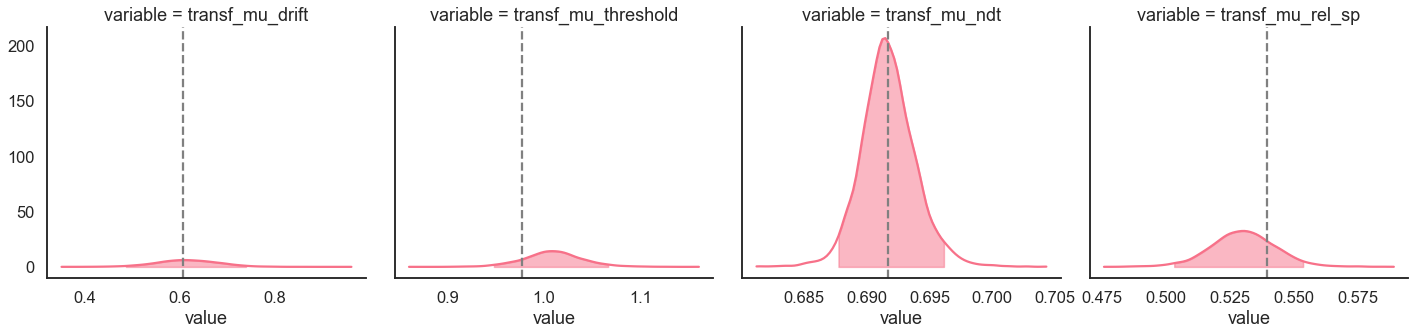

In [13]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')